# 1. Importation des librairies python

In [49]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt

# 2. Importation des données

In [50]:
engine = create_engine('sqlite:///data.db', echo=False)
con = engine.connect()
df_patient = pd.read_sql('select * from patient', con=con)
df_pcr = pd.read_sql('select * from test', con=con)
con.close()

In [51]:
# Affichage des données des 10 premiers patients
df_patient[:10]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,19710708.0,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown
2,231932,alice,conboy,35.0,mountain circuit,prospect,2305,nsw,19810905.0,22.0,02 20403934,None
3,465838,sienna,craswell,39.0,cumberlegeicrescent,henty,3620,wa,19840809.0,30.0,02 62832318,jodane
4,359178,joshua,bastiaans,144.0,lowrie street,campbell town,4051,nsw,19340430.0,31.0,03 69359594,None
5,744167,ky,laing,448.0,nyawi place,barmera,3556,qld,19050919.0,32.0,03 59872070,None
6,210268,matthew,laing,11.0,barnes place,laurieton,2160,nsw,19061018.0,29.0,02 86925029,None
7,832180,jack,renfrey,27.0,osmand street,maribyrnong,2170,qld,19610518.0,31.0,03 15575583,dhurringill
8,154886,adele,ryan,76.0,house circuit,new farm,2200,qld,19430102.0,33.0,07 37444521,None
9,237337,breeanne,wynne,12.0,cowper street,bonnet bay,2062,qld,19030606.0,35.0,08 24888117,None


In [52]:
print("le nombre de patients est :", len(df_patient['patient_id'].unique()))

le nombre de patients est : 19798


In [53]:
# Affichage des données des 10 premiers résultats PCR 
df_pcr[:10]

,patient_id,pcr
0,653091,N
1,347667,Negative
2,708481,Positive
3,148825,Negative
4,150081,Negative
5,876796,N
6,169224,Negative
7,755915,P
8,374486,N
9,634003,N


In [54]:
print("le total de PCR est :", len(df_pcr['patient_id'].unique()))

le total de PCR est : 8765


# 3. Suppression des données

In [55]:
def detect_duplicates(df):
    #Suppression des ID dupliqués
    df.drop_duplicates(["patient_id"],keep="first", inplace=True)
    #Remplacement des champs vides par nan
    df['given_name'].replace('', np.nan, inplace=True)
    df['surname'].replace('', np.nan, inplace=True)
    df['street_number'].replace('', np.nan, inplace=True)
    df['address_1'].replace('', np.nan, inplace=True)
    df['suburb'].replace('', np.nan, inplace=True)
    df['postcode'].replace('', np.nan, inplace=True)
    df['state'].replace('', np.nan, inplace=True)
    df['date_of_birth'].replace('', np.nan, inplace=True)
    df['age'].replace('', np.nan, inplace=True)
    df['phone_number'].replace('', np.nan, inplace=True)
    df['address_2'].replace('', np.nan, inplace=True)
    #Suppression des champs vides 
    df.dropna(subset=['given_name'], inplace=True)
    df.dropna(subset=['surname'], inplace=True)
    df.dropna(subset=['street_number'], inplace=True)
    df.dropna(subset=['address_1'], inplace=True)
    df.dropna(subset=['suburb'], inplace=True)
    df.dropna(subset=['postcode'], inplace=True)
    df.dropna(subset=['state'], inplace=True)
    df.dropna(subset=['date_of_birth'], inplace=True)
    df.dropna(subset=['age'], inplace=True)
    df.dropna(subset=['phone_number'], inplace=True)
    df.dropna(subset=['address_2'], inplace=True)
    return df



# 4. Jointure des tables 

In [57]:
df = pd.merge(df_patient, df_pcr, how="inner", left_on="patient_id", right_on="patient_id")

In [58]:
# Affichage de df
df

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr
0,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown,Negative
1,832180,jack,renfrey,27.0,osmand street,maribyrnong,2170,qld,19610518.0,31.0,03 15575583,dhurringill,P
2,517113,trey,glass,27.0,mugga way,carnegie,5093,nsw,19180715.0,21.0,08 08091408,blackridge flyfishing school,Negative
3,996942,zachary,piazza,772.0,beaney street,manunda,2223,wa,19750703.0,25.0,02 36108470,rsd frareen,N
4,323165,taylor,binns,2.0,dunbar street,mount annan,4455,wa,19000509.0,11.0,08 99185004,sec 528,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,444199,matthew,roebuck,44.0,fuhrman street,tea tree gully,6112,wa,19421123.0,36.0,03 12751519,greenbank,N
1853,124956,marleigh,seen,11.0,crisp circuit,lavington,2640,wa,19640108.0,27.0,04 65522089,stoneyhurst,N
1854,513727,kane,costigan,1.0,stonehaven crescent,shenton park,2203,nsw,19100707.0,22.0,04 55808760,townview,Negative
1855,230775,victoria,whiteley,12.0,beasley street,landsborough,2388,nsw,19491217.0,30.0,03 68108604,ponderosa,P


# 5. Représentation graphique des résultats

In [59]:
#Remplacement des résultats P par Positive
df['pcr'].replace(to_replace='P',
    value='Positive',
    inplace=True)
#Remplacement des résultats N par Negative
df['pcr'].replace(to_replace='N',
    value='Negative',
    inplace=True)

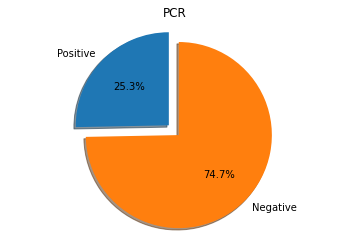

In [60]:
#Représentation graphique des pourcentages des PCR positifs et négarifs
a = (df['pcr'] == 'Positive').sum()
b = (df['pcr'] == 'Negative').sum()
name = ['Positive', 'Negative']
data = [a,b]

explode=(0, 0.15)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('PCR')
plt.show()

In [61]:
#Sélection des résultats des personnes agées de plus de 60 ans
df1 = df.loc[(df['date_of_birth'] / 10000 < 1950)]

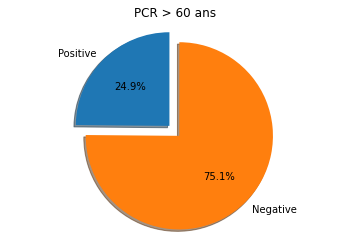

In [62]:
#Représentation graphique des pourcentages des PCR pour les personnes agées de plus de 60 ans
a = (df1['pcr'] == 'Positive').sum()
b = (df1['pcr'] == 'Negative').sum()
name = ['Positive', 'Negative']
data = [a,b]

explode=(0, 0.15)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('PCR > 60 ans')
plt.show()

In [63]:
#Sélection des résultats des personnes agées de moins de 60 ans
df2 = df.loc[(df['date_of_birth'] / 10000 >= 1950)]

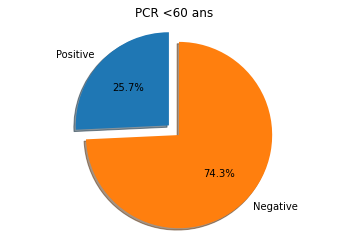

In [64]:
#Représentation graphique des pourcentages des PCR pour les personnes agées de moins de 60 ans
a = (df2['pcr'] == 'Positive').sum()
b = (df2['pcr'] == 'Negative').sum()
name = ['Positive', 'Negative']
data = [a,b]

explode=(0, 0.15)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('PCR <60 ans')
plt.axis('equal')
plt.show()

In [65]:
#Sélection des résultats de PCR Positifs
df3 = df.loc[(df['pcr'] == 'Positive')]

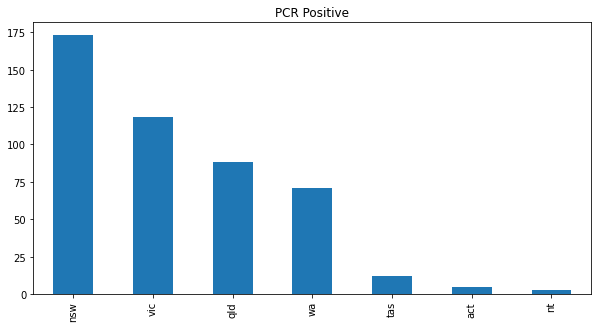

In [66]:
#Représentation graphique des résultats des PCR par localisation géographique
fig = plt.figure(1, figsize=(10, 5))
df3['state'].value_counts().plot(kind='bar',x='state',y='Positive')
plt.title('PCR Positive')
plt.show()

In [67]:
#Sélection des résultats de PCR Négatifs
df4 = df.loc[(df['pcr'] == 'Negative')]

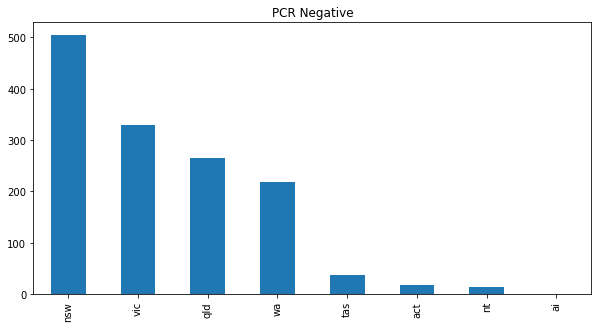

In [68]:
#Représentation graphique des résultats des PCR Négatifs par localisation géographique
fig = plt.figure(1, figsize=(10, 5))
df4['state'].value_counts().plot(kind='bar',x='state',y='Positive')
plt.title('PCR Negative')
plt.show()